In [ ]:
import pandas as pd
#read csv with index row
df=pd.read_csv('Combined Data.csv')
df.tail(5)

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import random
from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
#check missing data
df.isna().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [ ]:
#remove missing data
df.dropna(inplace = True)
df.isna().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [ ]:
df.status.value_counts()

,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


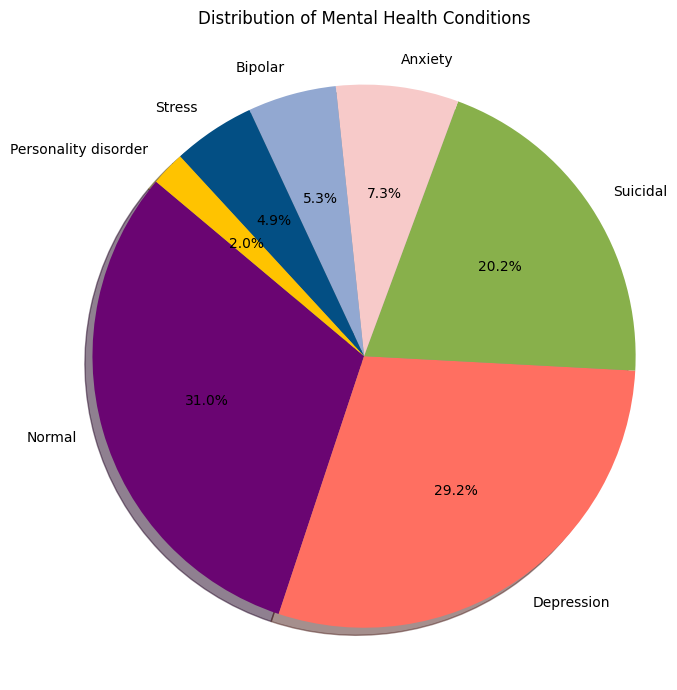

In [ ]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors)
colors = ['#6A0572', '#FF6F61', '#88B04B', '#F7CAC9', '#92A8D1', '#034F84', '#FFC300']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
#Looking at raw texts

# Group by status and get a random statement from each group
random_statements = df.groupby('status')['statement'].apply(lambda x: x.sample(n=1).iloc[0])

# Print the results
for status, statement in random_statements.items():
    print(f"Status: {status}")
    print(f"Statement: {statement}\n")

Status: Anxiety
Statement: 17, Need professional help but not sure if parents understand that I'm 17 and male. Since last year I've constantly thought im going to have a heart attack, cardiophobia. It's really starting to get in the way. 
  
It started with bad heart palpitations and arm pain and I took multiple trips to the urgent care center and a few ekgs, and they all said I was fine. It takes me so long to fall asleep at night because of this, I get anxiety attacks often, and I've formed a habit where I need to knock on wood almost all the time to calm me down a bit (weird habit)  
  
I'm not overweight and I go for bike rides a lot but my dad is always telling me to workout because he loves working out. I tried it months ago but the fear I was going to have one multiplied and I couldn't stand feeling my heart beat. He's trying to have me do guided meditation but for some reason that makes me way more anxious than when I started. He hasn't wanted me to go to therapy because I have

In [ ]:
# Calculate the length of each string in the 'statement' column
df['num_of_characters'] = df['statement'].apply(len)

# Now the column exists and the code should work
import nltk
nltk.download('punkt_tab')
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))
description = df[['num_of_characters', 'num_of_sentences']].describe()
print(description)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


       num_of_characters  num_of_sentences
count       52681.000000      52681.000000
mean          578.713863          6.280215
std           846.269078         10.688388
min             2.000000          1.000000
25%            80.000000          1.000000
50%           317.000000          3.000000
75%           752.000000          8.000000
max         32759.000000       1260.000000


In [ ]:
#lengthy messages can also express suicidal thoughts or signs of depression:

df[df['num_of_characters'] > 10000]

,Unnamed: 0,statement,status,num_of_characters,num_of_sentences
7851,7851,So introduction I guess.. my name is Michael a...,Depression,10679,136
9416,9416,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,Suicidal,25302,1
9504,9504,"Hello everyone,I rarely post on Reddit but.......",Depression,11163,139
10834,10834,I have only 1 person I can somewhat open to bu...,Suicidal,27390,237
11537,11537,"The title is not meant to discourage others, b...",Depression,12304,155
11581,11581,I no longer know what else to do but write thi...,Depression,13530,140
11636,11636,And has life gotten better?&amp;#x200B;No. Eve...,Depression,12819,96
11831,11831,Sorry this is long but I doubt anyone will eve...,Depression,11122,155
13293,13293,I cannot TAKE IT ANYMORE. I cannot TAKE IT ANY...,Suicidal,32759,1260
18215,18215,I am someone living in Turkey. My age is proba...,Suicidal,10219,180


In [ ]:
#Convert all statements to lowercase to ensure uniformity
df.rename(columns={'statement': 'original_statement'}, inplace=True)

df['statement']=df['original_statement'].str.lower()
df.head()

,Unnamed: 0,original_statement,status,num_of_characters,num_of_sentences,statement
0,0,oh my gosh,Anxiety,10,1,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2,"trouble sleeping, confused mind, restless hear..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2,"all wrong, back off dear, forward doubt. stay ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,61,1,i've shifted my focus to something else but i'...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,2,"i'm restless and restless, it's been a month n..."


In [ ]:
#Removing URLs, handles, punctuation and special characters
def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

# Apply the function to the 'statement' column
df['statement'] = df['statement'].apply(remove_patterns)
df.head()

,Unnamed: 0,original_statement,status,num_of_characters,num_of_sentences,statement
0,0,oh my gosh,Anxiety,10,1,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,61,1,ive shifted my focus to something else but im ...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,2,im restless and restless its been a month now ...


In [ ]:
# Apply word_tokenize to each element in the 'statement' column
df['tokens'] = df['statement'].apply(word_tokenize)
df.head()

,Unnamed: 0,original_statement,status,num_of_characters,num_of_sentences,statement,tokens
0,0,oh my gosh,Anxiety,10,1,oh my gosh,"[oh, my, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,61,1,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,2,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."


In [ ]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem tokens and convert them to strings
def stem_tokens(tokens):
    return ' '.join(stemmer.stem(str(token)) for token in tokens)

# Apply the function to the 'tokens' column
df['tokens_stemmed'] = df['tokens'].apply(stem_tokens)

df.head()

,Unnamed: 0,original_statement,status,num_of_characters,num_of_sentences,statement,tokens,tokens_stemmed
0,0,oh my gosh,Anxiety,10,1,oh my gosh,"[oh, my, gosh]",oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...",troubl sleep confus mind restless heart all ou...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...",all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,61,1,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...",ive shift my focu to someth els but im still w...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,2,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...",im restless and restless it been a month now b...


# Token Visualization by Word Cloud

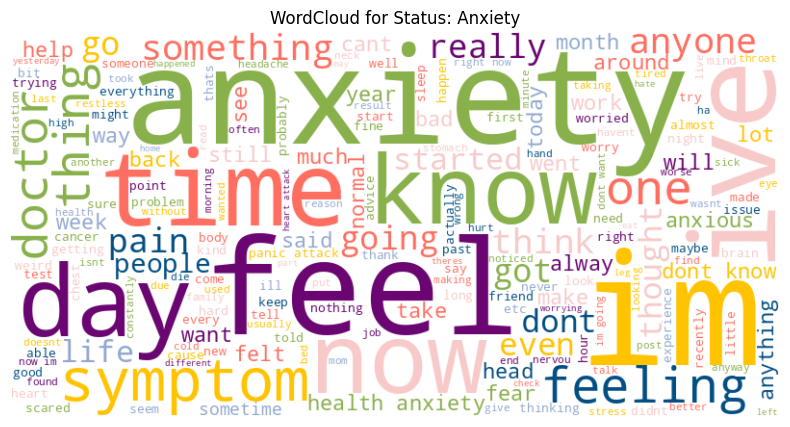

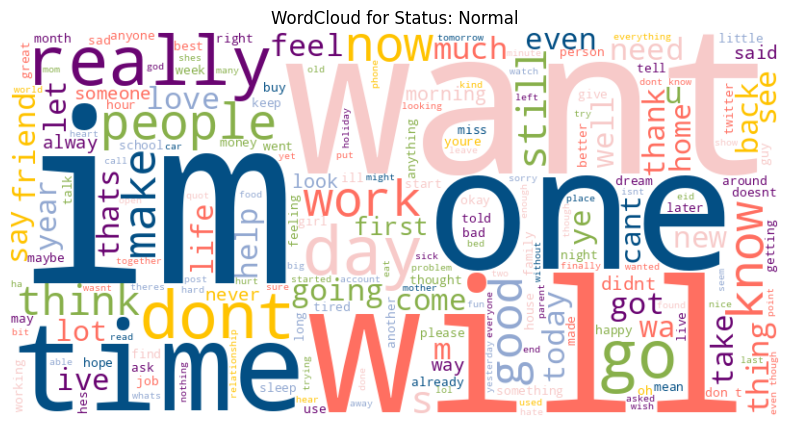

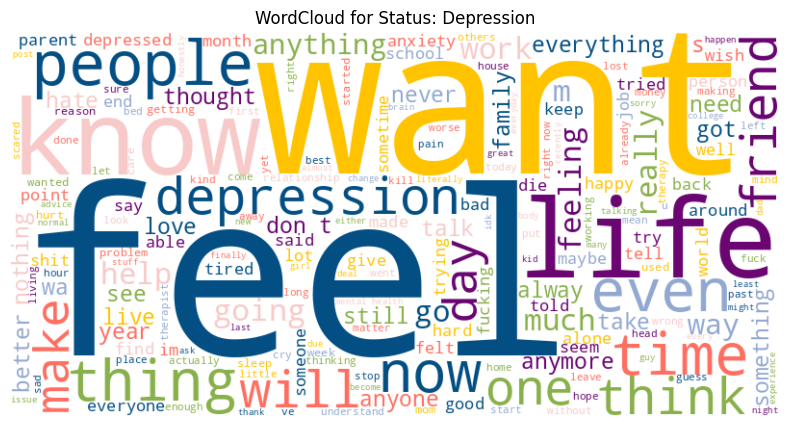

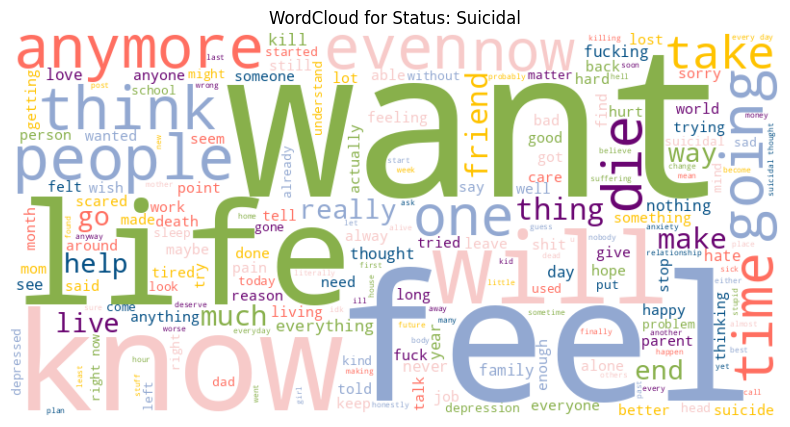

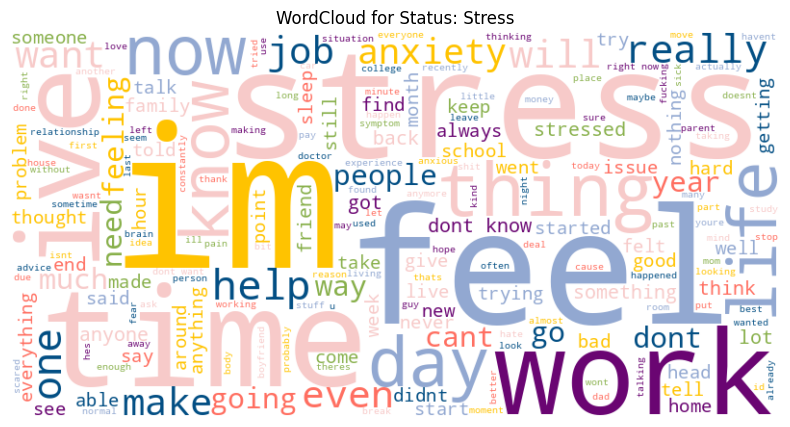

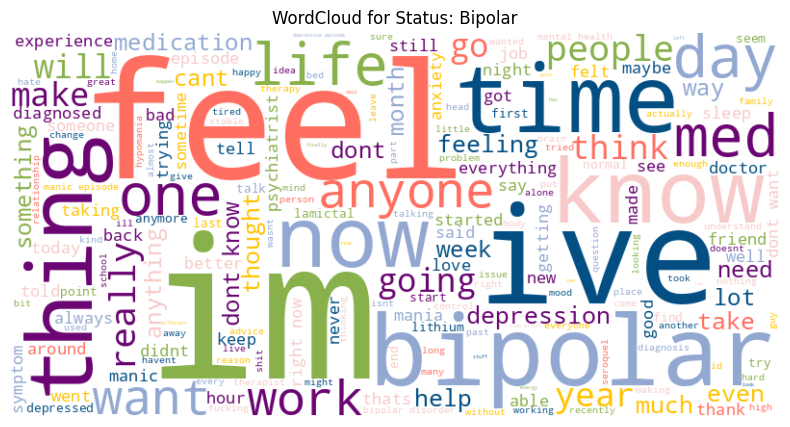

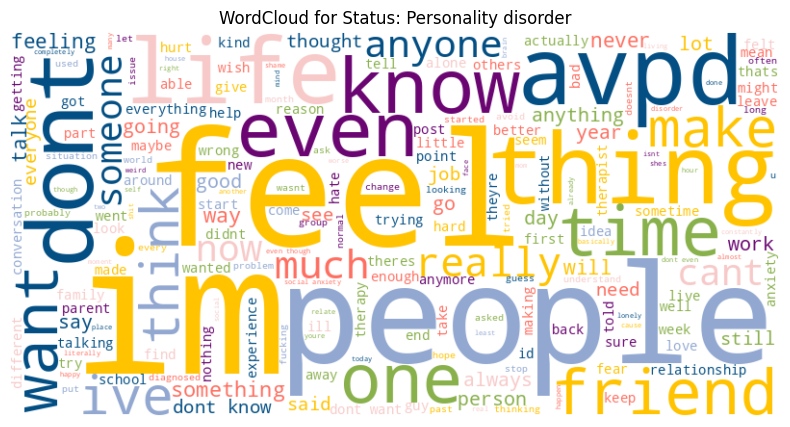

In [ ]:
#Word Clouds

# Get unique categories in 'status'
statuses = df['status'].unique()

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

# Generate and plot the WordCloud for each category
for status in statuses:
    # Filter the tokens data for the current status
    tokens_data = ' '.join(df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f'WordCloud for Status: {status}')
    plt.show()

In [ ]:
#Separate features and labels
X = df[['tokens_stemmed', 'num_of_characters', 'num_of_sentences']]
y = df['status']

In [ ]:
#Label encoding target variable
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(y.values)

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#Convert text to features using TF-IDF vectoriser
# 1. Initialize TF-IDF Vectorizer and fit/transform on the 'tokens' column
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_train['tokens_stemmed'])
X_test_tfidf = vectorizer.transform(X_test['tokens_stemmed'])

# 2. Extract numerical features
X_train_num = X_train[['num_of_characters', 'num_of_sentences']].values
X_test_num = X_test[['num_of_characters', 'num_of_sentences']].values

# 3. Combine TF-IDF features with numerical features
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

print('Number of feature words: ', len(vectorizer.get_feature_names_out()))

Number of feature words:  50000


In [ ]:
X_train_combined.shape

(42144, 50002)

In [ ]:
#Resampling
# Apply Random Over-Sampling on the vectorized data
ros = RandomOverSampler(random_state=101)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_combined, y_train)

In [ ]:
X_train_resampled.shape

(91742, 50002)

In [ ]:
#Model training and evaluation
# Define a dictionary of classifiers with their specific parameters.
# Note: The hyperparameters for these classifiers were chosen after performing GridSearchCV to optimize performance.
classifiers = {
    'Bernoulli Naive Bayes': BernoulliNB(alpha=0.1, binarize=0.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=101),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1', C=10, random_state=101),
    'XGB': XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=500, random_state=101, tree_method='hist')
}

# 2 hour execution time

# To load and save the best model

run in your own risk around 2 hour!!!!!



For Bernoulli Naive Bayes
Accuracy: 0.6405997912119199
                      precision    recall  f1-score   support

             Anxiety       0.67      0.60      0.63       768
             Bipolar       0.70      0.58      0.64       566
          Depression       0.66      0.48      0.55      3050
              Normal       0.67      0.93      0.78      3237
Personality disorder       0.87      0.33      0.48       202
              Stress       0.42      0.52      0.47       530
            Suicidal       0.59      0.53      0.56      2184

            accuracy                           0.64     10537
           macro avg       0.65      0.57      0.59     10537
        weighted avg       0.64      0.64      0.63     10537



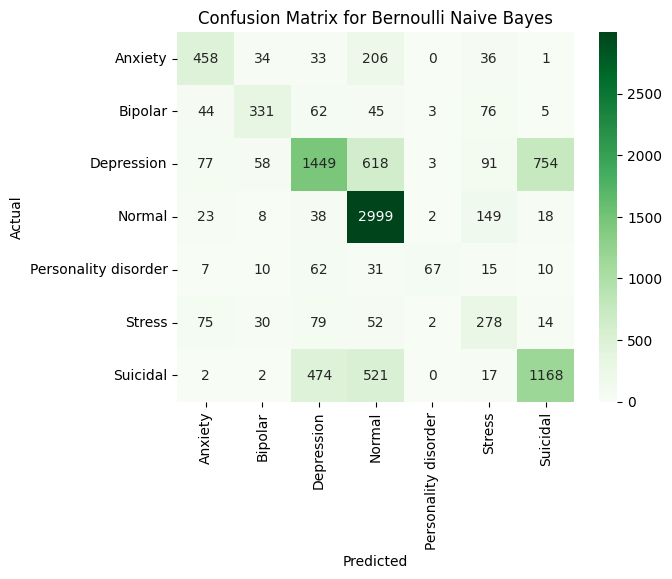



For Decision Tree
Accuracy: 0.6175381987282907
                      precision    recall  f1-score   support

             Anxiety       0.69      0.55      0.61       768
             Bipolar       0.46      0.63      0.53       566
          Depression       0.79      0.34      0.48      3050
              Normal       0.87      0.85      0.86      3237
Personality disorder       0.51      0.47      0.48       202
              Stress       0.24      0.80      0.37       530
            Suicidal       0.52      0.65      0.58      2184

            accuracy                           0.62     10537
           macro avg       0.58      0.61      0.56     10537
        weighted avg       0.70      0.62      0.62     10537



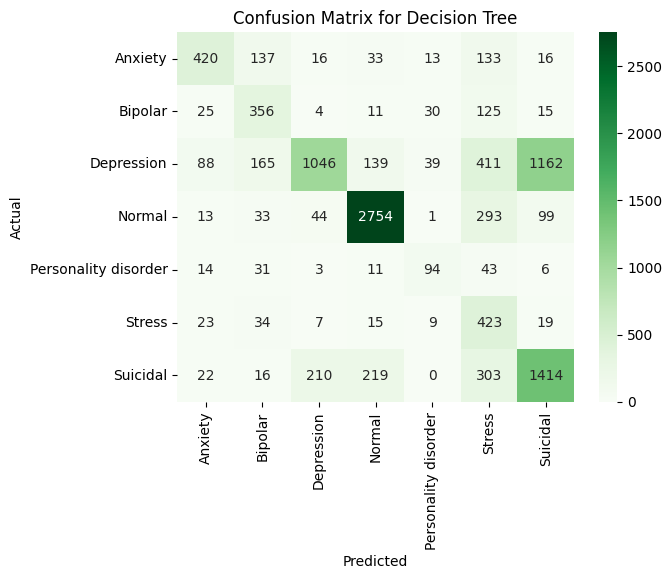



For Logistic Regression
Accuracy: 0.7653981209072791
                      precision    recall  f1-score   support

             Anxiety       0.78      0.81      0.80       768
             Bipolar       0.84      0.80      0.82       566
          Depression       0.72      0.67      0.69      3050
              Normal       0.90      0.92      0.91      3237
Personality disorder       0.71      0.64      0.68       202
              Stress       0.59      0.65      0.62       530
            Suicidal       0.65      0.68      0.67      2184

            accuracy                           0.77     10537
           macro avg       0.74      0.74      0.74     10537
        weighted avg       0.77      0.77      0.76     10537



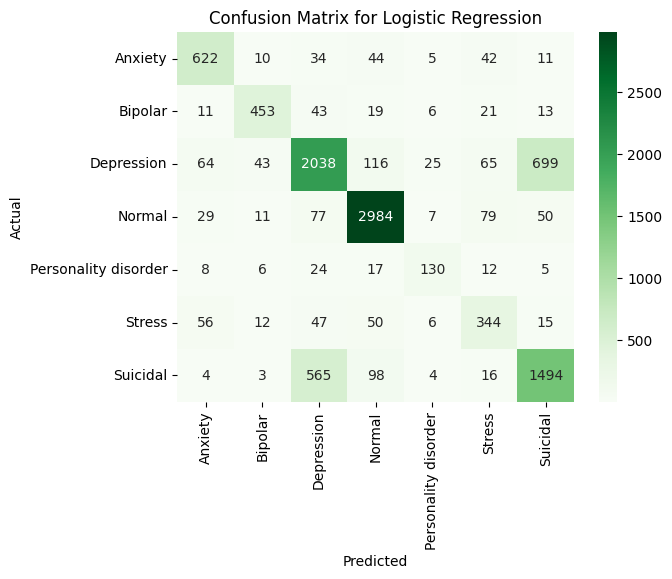



For XGB
Accuracy: 0.8074404479453355
                      precision    recall  f1-score   support

             Anxiety       0.83      0.87      0.85       768
             Bipolar       0.87      0.82      0.85       566
          Depression       0.78      0.73      0.75      3050
              Normal       0.92      0.93      0.93      3237
Personality disorder       0.82      0.66      0.73       202
              Stress       0.67      0.76      0.71       530
            Suicidal       0.69      0.73      0.71      2184

            accuracy                           0.81     10537
           macro avg       0.80      0.79      0.79     10537
        weighted avg       0.81      0.81      0.81     10537



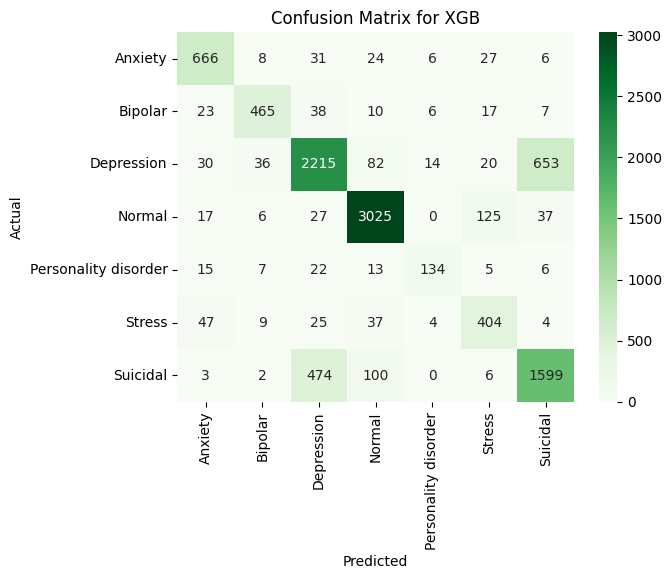

Best model saved with accuracy: 0.8074404479453355


In [ ]:
from joblib import dump

# Initialize a variable to store the best model
accuracy_scores = []
best_model = None
best_accuracy = 0

# Iterate over each classifier and its name in the classifiers dictionary
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = clf.predict(X_test_combined)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    print("\n")
    print("For", name)
    print("Accuracy:", accuracy)

    # Check if this classifier has the highest accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf  # Store the best model

    # Print classification report and confusion matrix (as in your original code)
    labels = lbl_enc.classes_
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=labels))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    accuracy_scores.append(accuracy)

# Save the best model (XGBoost in this case)
dump(best_model, 'xgb_depression_model.joblib')
print(f"Best model saved with accuracy: {best_accuracy}")

# Save the trained model

In [ ]:
import joblib

# Save the model with a .joblib extension
joblib.dump(accuracy_scores, "acc.joblib")
print("Accuracy saved successfully!")

Accuracy saved successfully!


In [ ]:
import joblib
import pickle

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("vectorizer saved successfully!")

vectorizer saved successfully!


In [ ]:
from google.colab import files
files.download("acc.joblib")
files.download("tfidf_vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

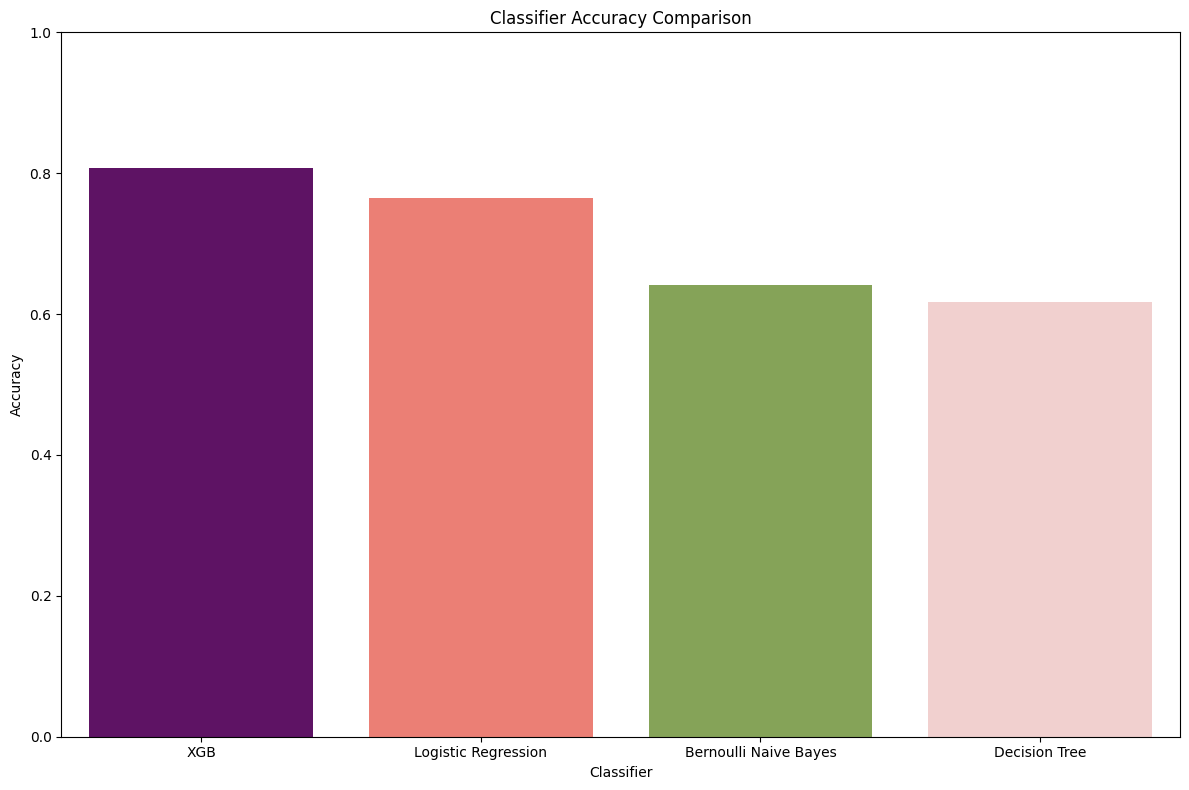

In [ ]:
import joblib
import pandas as pd

# Load the pre-trained model
accuracy_scores1 = joblib.load("acc.joblib")

# Create a DataFrame to store classifier names and their corresponding accuracy scores
accuracies_df = pd.DataFrame({'Classifier': classifiers.keys(), 'Accuracy': accuracy_scores1}).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(12, 8))
palette = dict(zip(accuracies_df['Classifier'], colors[:5]))

# Create a bar plot to visualize the accuracy of each classifier
sns.barplot(x='Classifier', y='Accuracy', data=accuracies_df, palette=palette)

plt.title("Classifier Accuracy Comparison")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Deployment

In [1]:
# Install dependencies
!pip install gradio torch transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import joblib
import numpy as np
import gradio as gr
from scipy.sparse import hstack

# Load the saved model and vectorizer
model = joblib.load("xgb_depression_model.joblib")  # Ensure this is the correct model file
vectorizer = joblib.load("tfidf_vectorizer.pkl")  # Ensure this is the correct vectorizer file

def detect_depression(sentence):
    try:
        # Step 1: Transform the input sentence into TF-IDF features
        tfidf_features = vectorizer.transform([sentence])
        print(f"TF-IDF Features Shape: {tfidf_features.shape}")  # Debugging

        # Step 2: Extract numerical features from the input sentence
        num_characters = len(sentence)
        num_sentences = sentence.count('.') + sentence.count('!') + sentence.count('?')
        num_features = np.array([[num_characters, num_sentences]])
        print(f"Numerical Features: {num_features}")  # Debugging

        # Step 3: Combine TF-IDF features with numerical features
        combined_features = hstack([tfidf_features, num_features])
        print(f"Combined Features Shape: {combined_features.shape}")  # Debugging

        # Step 4: Get prediction probabilities (for multi-class models)
        probabilities = model.predict_proba(combined_features)
        print(f"Prediction Probabilities: {probabilities}")  # Debugging

        # Step 5: Choose the label with the highest probability
        predicted_label = np.argmax(probabilities, axis=1)[0]

        if predicted_label == 2:
            return "Depressed"
        else:
            return "Not Depressed"
    except Exception as e:
        print(f"Error: {e}")  # Debugging
        return f"Error: {e}"

# Create Gradio interface
interface = gr.Interface(
    fn=detect_depression,
    inputs=gr.Textbox(lines=2, placeholder="Enter a sentence..."),
    outputs="text",
    title="Depression Detection",
    description="Enter a sentence to determine if it indicates depression or not depression.",
    live=True
)

# Launch the interface
interface.launch(share=True, debug=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ebba8a928c165679f6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
